#### HOUSE PRICE PREDICTION USING BENGALURU DATASET

## Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [3]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

## Loading the dataset

In [4]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Index of bucket\New folder\Bengaluru_House_Data.csv")

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Data Overview

1. The Dataset has 13320 rows
2. The Dataset has 9 columns

In [6]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [7]:
df.tail(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [8]:
df.shape

(13320, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
df.isna().sum().sort_values(ascending=False)
#df.isnull().sum()
#sorting from ascending to decending

society         5502
balcony          609
bath              73
size              16
location           1
area_type          0
availability       0
total_sqft         0
price              0
dtype: int64

In [11]:
df.duplicated().sum()
#drop duplicate

529

In [12]:
df.drop_duplicates(inplace=True)
#t drop duplicateb

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(12791, 9)

In [15]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [16]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [17]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [18]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df['bedroom'] = df['size'].str.split(' ',expand=True)[0]
#to split the size cloumn into the bedroom column

In [20]:
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
 9   bedroom       12775 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


In [22]:
df.drop(columns='size', inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   society       7463 non-null   object 
 4   total_sqft    12791 non-null  object 
 5   bath          12718 non-null  float64
 6   balcony       12186 non-null  float64
 7   price         12791 non-null  float64
 8   bedroom       12775 non-null  float64
dtypes: float64(4), object(5)
memory usage: 999.3+ KB


In [24]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
df[['lower', 'upper']] = df['total_sqft'].str.split('- ', expand=True)
#to split a column into 2 cloumns

In [26]:
df.head(3)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,lower,upper
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0,1056,None
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0,2600,None
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0,1440,None


In [27]:
df['lower'] = pd.to_numeric(df['lower'], errors='coerce')

df['upper'] = pd.to_numeric(df['upper'], errors='coerce')

In [28]:
df.head(3)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,lower,upper
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0,1056.0,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0,2600.0,NaN
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0,1440.0,NaN


In [29]:
##to fill NAN value with o
df['upper'].fillna(0, inplace=True)

In [30]:
df['average_sqft'] = df.apply(lambda x: x['lower'] if x['upper'] == 0 else (x['upper'] + x['lower']) / 2, axis=1)

In [31]:
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,lower,upper,average_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2.0,1056.0,0.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4.0,2600.0,0.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3.0,1440.0,0.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3.0,1521.0,0.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2.0,1200.0,0.0,1200.0


In [32]:
df.drop(columns='total_sqft', inplace=True)
df.drop(columns='lower', inplace=True)
df.drop(columns='upper', inplace=True)

In [33]:
df.head()

,area_type,availability,location,society,bath,balcony,price,bedroom,average_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,62.00,3.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,95.00,3.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,NaN,2.0,1.0,51.00,2.0,1200.0


In [34]:
df = df.rename(columns={'average_sqft': 'total-sqft'})
# to rename an existing column

In [35]:
df.head(3)

,area_type,availability,location,society,bath,balcony,price,bedroom,total-sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,39.07,2.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,120.00,4.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,62.00,3.0,1440.0


In [36]:
df.columns

Index(['area_type', 'availability', 'location', 'society', 'bath', 'balcony',
       'price', 'bedroom', 'total-sqft'],
      dtype='object')

In [37]:
df = df[['area_type', 'availability', 'location', 'society', 'bath', 'balcony','bedroom', 'total-sqft','price']]

In [38]:
df.head()

,area_type,availability,location,society,bath,balcony,bedroom,total-sqft,price
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,2.0,1.0,2.0,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,NaN,2.0,1.0,2.0,1200.0,51.00


In [39]:
df['price'].describe()
#to describe a particular column 

count    12791.000000
mean       114.317646
std        151.480310
min          8.000000
25%         50.000000
50%         73.000000
75%        121.000000
max       3600.000000
Name: price, dtype: float64

In [40]:
df[df['location'] =='Chikka Tirupathi']
# to filter data out

,area_type,availability,location,society,bath,balcony,bedroom,total-sqft,price
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,2600.0,120.00
1265,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,4.0,1.0,4.0,2325.0,120.00
1535,Built-up Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,2.0,5.0,3356.0,105.00
1568,Plot Area,Ready To Move,Chikka Tirupathi,FiriaVi,4.0,2.0,3.0,1808.0,80.27
2675,Plot Area,18-May,Chikka Tirupathi,Theanmp,3.0,1.0,3.0,3297.0,135.00
2745,Plot Area,18-Dec,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,3500.0,150.00
3526,Plot Area,Ready To Move,Chikka Tirupathi,NaN,3.0,0.0,3.0,1616.0,95.00
8394,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,NaN,4.0,3056.0,100.00
8719,Plot Area,Ready To Move,Chikka Tirupathi,NaN,3.0,NaN,3.0,2646.0,99.00
8840,Plot Area,16-Dec,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,4500.0,150.00


In [41]:
#dealing with outlier in price. 
#note: not the same with other data
#(df['price'] > = 50) & (df['price'] < =400) --- condition
#for filtering/masking
df[(df['price'] >= 50) & (df['price'] <= 400)]

,area_type,availability,location,society,bath,balcony,bedroom,total-sqft,price
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,NaN,2.0,1.0,2.0,1200.0,51.00
6,Super built-up Area,18-May,Old Airport Road,Jaades,4.0,NaN,4.0,2732.0,204.00
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,NaN,2.0,2.0,2.0,1050.0,52.71
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,3.0,3.0,3.0,1715.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,4.0,0.0,5.0,3453.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,NaN,5.0,NaN,4.0,3600.0,400.00


In [42]:
df = df[(df['price'] >= 50) & (df['price'] <= 400)]

In [43]:
df['price'].describe()

count    9322.000000
mean      113.947127
std        72.018304
min        50.000000
25%        65.000000
50%        86.855000
75%       135.000000
max       400.000000
Name: price, dtype: float64

In [44]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,total-sqft,price
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,2600.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,1440.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,1521.0,95.0


In [45]:
# to convert total-sqft to sqm
df['total_sqm'] = (df['total-sqft'] * 0.0929034)

In [46]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,total-sqft,price,total_sqm
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,2600.0,120.0,241.548840
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,1440.0,62.0,133.780896
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,1521.0,95.0,141.306071


In [47]:
df['total_sqm'] = round((df['total-sqft'] * 0.092903), 2)


In [48]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,total-sqft,price,total_sqm
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,2600.0,120.0,241.55
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,1440.0,62.0,133.78
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,1521.0,95.0,141.31


In [49]:
df.drop(columns='total-sqft', inplace=True)

In [50]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,price,total_sqm
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,120.0,241.55
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,62.0,133.78
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,95.0,141.31


In [51]:
df['price_per_sqm'] = df['price'] / df['total_sqm']
# To get the price per sqm

In [52]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,price,total_sqm,price_per_sqm
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,120.0,241.55,0.496792
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,62.0,133.78,0.463447
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,95.0,141.31,0.672281


In [53]:
df['price_per_sqm'] = round(df['price'] / df['total_sqm'], 2)

In [54]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,price,total_sqm,price_per_sqm
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,120.0,241.55,0.50
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,62.0,133.78,0.46
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,95.0,141.31,0.67


In [55]:
df['location'].unique()

array(['Chikka Tirupathi', 'Uttarahalli', 'Lingadheeranahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [56]:
df['location'].nunique()
# total  number of unique value in a column

1149

In [57]:
df['location'].value_counts()

location
Whitefield                              395
Sarjapur  Road                          303
Kanakpura Road                          184
Thanisandra                             173
Yelahanka                               154
                                       ... 
ravindra nagar, T.dasarahalli peenya      1
Rukmaiah Layout                           1
Devasandra Extension                      1
RTO ullalu                                1
Abshot Layout                             1
Name: count, Length: 1149, dtype: int64

In [58]:
#df['location'].value_counts()> = 10
df = df[df['location'].map(df['location'].value_counts()) >= 10]

In [59]:
df['location'].value_counts()

location
Whitefield              395
Sarjapur  Road          303
Kanakpura Road          184
Thanisandra             173
Yelahanka               154
                       ... 
Nagasandra               10
Shampura                 10
5th Block Hbr Layout     10
Benson Town              10
Hoskote                  10
Name: count, Length: 195, dtype: int64

In [60]:
df.columns

Index(['area_type', 'availability', 'location', 'society', 'bath', 'balcony',
       'bedroom', 'price', 'total_sqm', 'price_per_sqm'],
      dtype='object')

In [61]:
df= df[['area_type', 'availability', 'location', 'society', 'bath', 'balcony',
       'bedroom', 'total_sqm', 'price_per_sqm', 'price']]
#to rearrange the column

In [62]:
df.head(3)

,area_type,availability,location,society,bath,balcony,bedroom,total_sqm,price_per_sqm,price
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,5.0,3.0,4.0,241.55,0.50,120.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,2.0,3.0,3.0,133.78,0.46,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,3.0,1.0,3.0,141.31,0.67,95.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6930 entries, 1 to 13317
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      6930 non-null   object 
 1   availability   6930 non-null   object 
 2   location       6930 non-null   object 
 3   society        4638 non-null   object 
 4   bath           6883 non-null   float64
 5   balcony        6583 non-null   float64
 6   bedroom        6928 non-null   float64
 7   total_sqm      6909 non-null   float64
 8   price_per_sqm  6909 non-null   float64
 9   price          6930 non-null   float64
dtypes: float64(6), object(4)
memory usage: 595.5+ KB


In [64]:
#to check for correlation
df_numeric = df.select_dtypes(include=['float', 'int'])
corr_matrix = df_numeric.corr()

corr_matrix

,bath,balcony,bedroom,total_sqm,price_per_sqm,price
bath,1.000000,0.158464,0.868478,0.404615,0.020110,0.567710
balcony,0.158464,1.000000,0.146831,0.126909,-0.008945,0.104750
bedroom,0.868478,0.146831,1.000000,0.333880,0.019966,0.487617
total_sqm,0.404615,0.126909,0.333880,1.000000,-0.023547,0.561858
price_per_sqm,0.020110,-0.008945,0.019966,-0.023547,1.000000,0.015463
price,0.567710,0.104750,0.487617,0.561858,0.015463,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

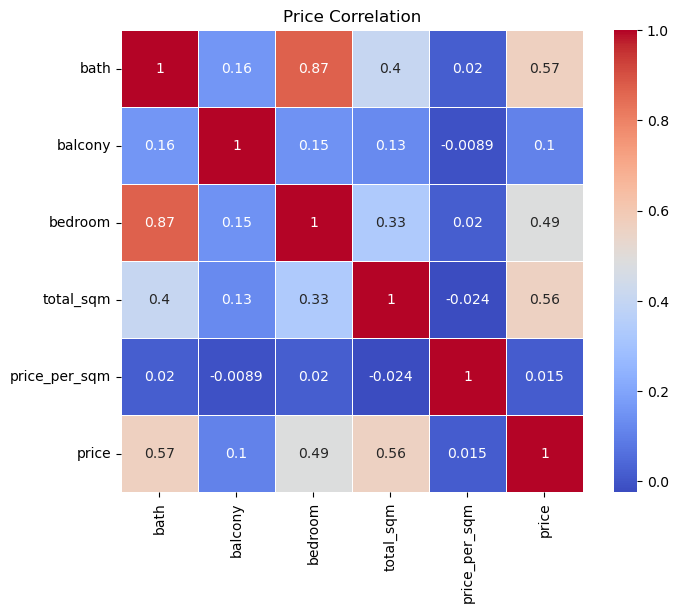

In [65]:
# Visualization for correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            square=True,
            linewidths=0.5)
plt.title('Price Correlation')
plt.show
            

In [66]:
df.columns

Index(['area_type', 'availability', 'location', 'society', 'bath', 'balcony',
       'bedroom', 'total_sqm', 'price_per_sqm', 'price'],
      dtype='object')

In [67]:
df.drop(columns = ['area_type','availability',  'society',  'balcony', 'price_per_sqm', 'bath'], inplace = True)

In [68]:
df.head()

,location,bedroom,total_sqm,price
1,Chikka Tirupathi,4.0,241.55,120.0
2,Uttarahalli,3.0,133.78,62.0
3,Lingadheeranahalli,3.0,141.31,95.0
4,Kothanur,2.0,111.48,51.0
6,Old Airport Road,4.0,253.81,204.0


In [69]:
df.columns

Index(['location', 'bedroom', 'total_sqm', 'price'], dtype='object')

In [70]:
# To split data into features X and target y
# X=df[['Location', 'bedroom', ''total sqm]]
# X= df[-1]

features = ['location', 'bedroom', 'total_sqm']
target  = ['price']

X = df[features]
y = df[target]

In [71]:
X.head()

,location,bedroom,total_sqm
1,Chikka Tirupathi,4.0,241.55
2,Uttarahalli,3.0,133.78
3,Lingadheeranahalli,3.0,141.31
4,Kothanur,2.0,111.48
6,Old Airport Road,4.0,253.81


In [72]:
X.shape

(6930, 3)

In [73]:
y.head()

,price
1,120.0
2,62.0
3,95.0
4,51.0
6,204.0


In [74]:
y.shape

(6930, 1)

In [75]:
# split data into training and testing data

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train.shape

(5544, 3)

In [77]:
X_test.shape

(1386, 3)

In [78]:
# calculating the baseline price and MAE

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

print("Mean apt price", round(y_mean,2))

print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline)) 

Mean apt price price    111.37
dtype: float64
Baseline MAE: 50.558693008730884


In [79]:
# Build the model with pipeline

model = make_pipeline(
        OneHotEncoder(handle_unknown = 'ignore'),
        SimpleImputer(),
        LinearRegression()
)

model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_error

In [ ]:
X = df.drop_colums['all colums except the one you want to predict']
Y = df['columns you want to predict']

In [ ]:
Train the linear Regrassion Model
Next, we fit a linear regression model on the training data

test [x,y], train [x,y]
#Split the dataset into training and testing sets(80% train, 20% test)
x_train, x_test, y_train, y_test = train_test, split(x,y, test_size=0.2, random_state=42)